In [14]:
from videogpt import VQVAE, VideoData

In [15]:
model = VQVAE.load_from_checkpoint("/space/ddenblanken/Projects/VideoGPT/moving_mnist_vqvae/v0waoz24/checkpoints/epoch=62-step=18711.ckpt")

# disable randomness, dropout, etc...
model.eval()
print()

In [18]:
data = VideoData(model.args)

val_dataset = data._dataset(False)

In [19]:
# (10000, torch.Size([3, 16, 64, 64]))
len(val_dataset), val_dataset[0]['video'].shape

(500, torch.Size([3, 16, 64, 64]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

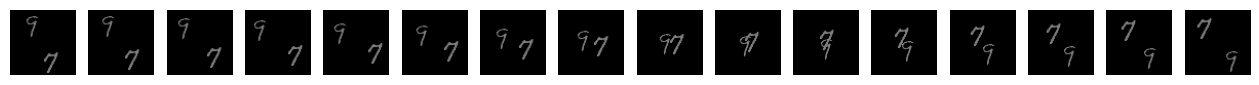

In [26]:
import numpy as np
import matplotlib.pyplot as plt

index = 0

fig, ax = plt.subplots(1, 16, figsize=(16, 1))
original = val_dataset[index]['video'].permute(1, 2, 3, 0).numpy()

for i in range(16):
    ax[i].imshow(original[i])
    ax[i].axis("off")

In [27]:
device = "cuda:3"
import torch
model = model.to(device)

In [28]:
# Feed data into model and get the x_recon and plot it (second output from forward)

x = val_dataset[index]['video'].unsqueeze(0)
x = x.to(device)

_, x_recon, _ = model(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

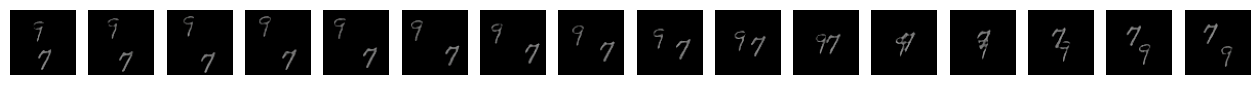

In [29]:
fig, ax = plt.subplots(1, 16, figsize=(16, 1))
video = x_recon[0].permute(1, 2, 3, 0).cpu().detach().numpy()

for i in range(16):
    ax[i].imshow(video[i])
    ax[i].axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

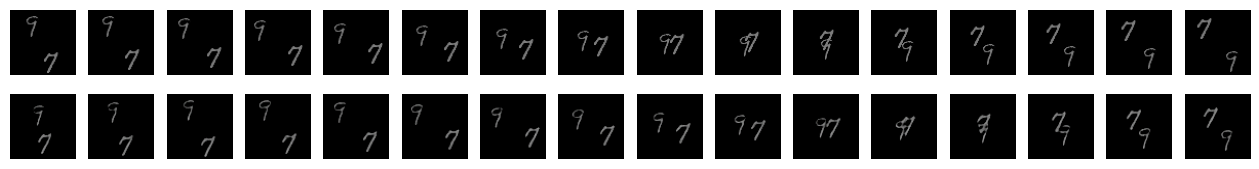

In [30]:
# Make a figure that plots both original and reconstructed video

fig, ax = plt.subplots(2, 16, figsize=(16, 2))

for i in range(16):
    ax[0, i].imshow(original[i])
    ax[0, i].axis("off")
    ax[1, i].imshow(video[i])
    ax[1, i].axis("off")